In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import precision_recall_fscore_support

from models.MeTooDataset import MeTooDataset
from models import SentenceEmbeddings

In [2]:
labels = ['Objectification of Women', 'Gender Equality', 'Conservatism']

In [3]:
experiment_name = '2D'

In [4]:
algorithm_name = 'embedding'

In [5]:
training_dataset = MeTooDataset(
    root='/Users/nmueller/Documents/Thesis/data',
    mode='word_embeddings',
    task='target_training'
)

In [6]:
testing_dataset = MeTooDataset(
    root='/Users/nmueller/Documents/Thesis/data',
    mode='word_embeddings',
    task='target_testing'
)

In [7]:
predictions = SentenceEmbeddings.train_and_predict(
    training_dataset,
    testing_dataset
)

[LibLinear]

In [8]:
df = pd.DataFrame.from_records(
        precision_recall_fscore_support(
            testing_dataset.y, 
            predictions
        )[:3], 
        index=['Precision', 'Recall', 'F1-Score'], 
        columns=[labels[idx] for idx in set(testing_dataset.y)]
    ).transpose()

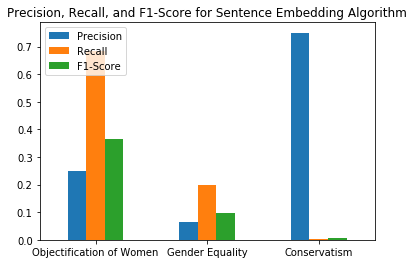

In [9]:
df.plot(kind='bar', title=f'Precision, Recall, and F1-Score for Sentence Embedding Algorithm', legend=True, rot=0)
plt.legend(loc='upper left')

with open(f'/Users/nmueller/Documents/Thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [10]:
with open(f'/Users/nmueller/Documents/Thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}.tex', 'w', encoding='utf-8') as f:
    df.to_latex(f)